<a href="https://colab.research.google.com/github/zangell44/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns

### Load Data as a Pandas Dataframe

In [2]:
credit_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'

# label attribute names consistent with description
attribute_names = ['A' + str(i) for i in range(1,17)]

credit = pd.read_csv(credit_data_url, header=None, names=attribute_names)
credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).

From UCI, we should have 690 observations with 15 attributes, plus the target variable.

In [3]:
assert credit.shape == (690,16)

print ('We have the correct data size')

We have the correct data size


### UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na

From UCI -

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

In [4]:
# lets check our data for nulls
credit.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [5]:
# clearly theres a problem with our data recognizing nulls
# from a text search of the raw data, it looks like nulls are represented by '?'

credit = credit.replace('?', np.nan)
credit.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

Our null values now match the data set description.

### Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

In [6]:
credit.dtypes # initial datatype check

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

The following modifications need to be made:

*A2 must be a float
*A11 must be converted from int to float
*A14 must be continuous
*A15 must be converted from int to float

In [7]:
credit.A2 = credit.A2.astype(float)
credit.A11 = credit.A11.astype(float)
credit.A14 = credit.A14.astype(float)
credit.A15 = credit.A15.astype(float)

# check dtypes again
credit.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" between them and the class label, and apply the Chi-squared test to them. There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end. This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# list categorical and continuous features for ease of use later
features_cont = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
features_cat = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
target = 'A16'

### Data Exploration

#### Continuous Features

In [9]:
credit[features_cont].describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


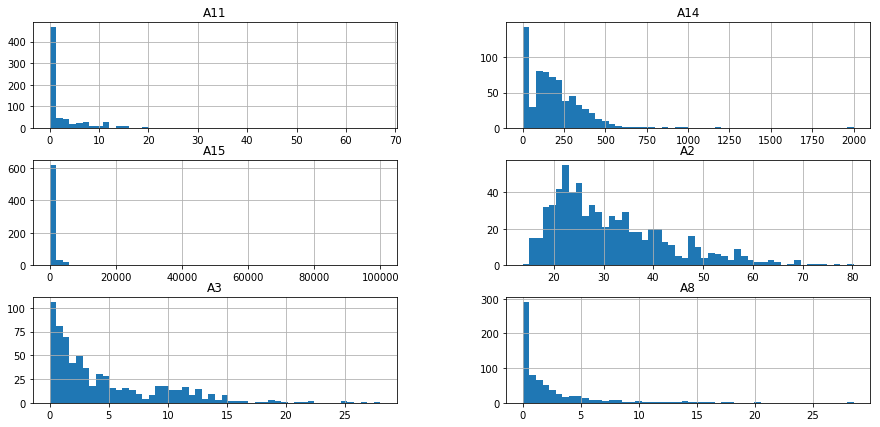

In [10]:
credit[features_cont].hist(figsize=(15,7), bins=50); # distribution of the variables in general

Something we can already note is that the distributions of the continuous variables do not seem to be normal. Let's see what they look like when we incorporate accept/reject into the visual.

In [0]:
# fig_cont, axes_cont = plt.subplots(2, 3, figsize=(20,10))

# axes_cont[0][0] = sns.swarmplot(x=target, y='A2', data=credit)
# axes_cont[1][1] = sns.swarmplot(x=target, y='A3', data=credit)
# axes_cont[0][2] = sns.swarmplot(x=target, y='A8', data=credit)
# axes_cont[1][0] = sns.swarmplot(x=target, y='A11', data=credit)
# axes_cont[0][1] = sns.swarmplot(x=target, y='A14', data=credit)
# axes_cont[1][2] = sns.swarmplot(x=target, y='A15', data=credit)

# plt.show()

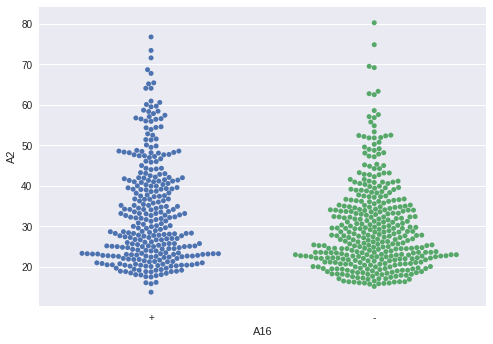

In [87]:
sns.swarmplot(x=target, y='A2', data=credit);

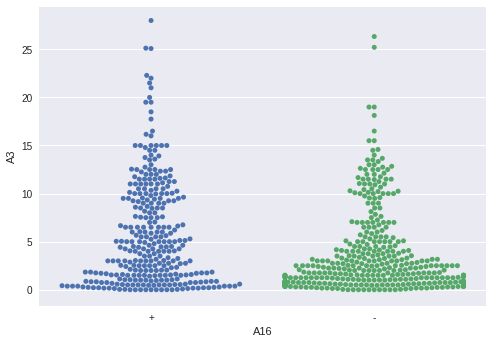

In [88]:
sns.swarmplot(x=target, y='A3', data=credit);

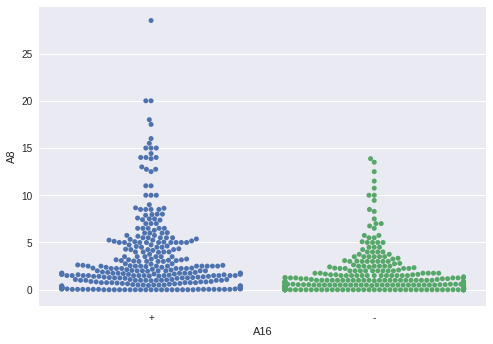

In [89]:
sns.swarmplot(x=target, y='A8', data=credit);

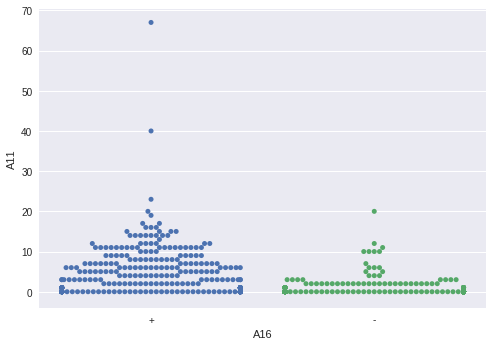

In [90]:
sns.swarmplot(x=target, y='A11', data=credit);

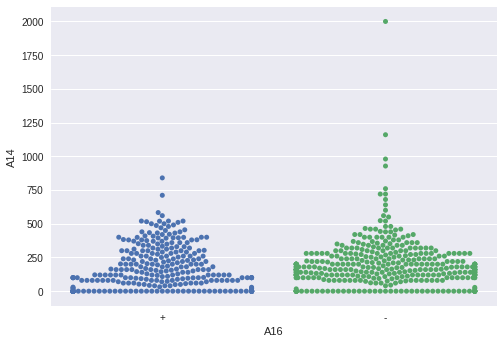

In [100]:
sns.swarmplot(x=target, y='A14', data=credit);

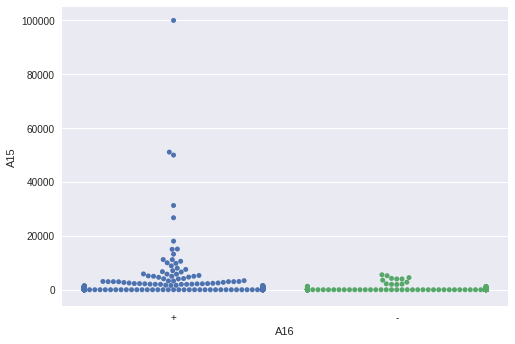

In [101]:
sns.swarmplot(x=target, y='A15', data=credit);

#### Discrete Features

In [27]:
credit[features_cat].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
count,678,684,684,681,681,690,690,690,690
unique,2,3,3,14,9,2,2,2,3
top,b,u,g,c,v,t,f,f,g
freq,468,519,519,137,399,361,395,374,625


In [93]:
pd.crosstab(credit['A1'], credit[target])

A16,+,-
A1,,
a,98,112
b,206,262


In [94]:
pd.crosstab(credit['A4'], credit[target])

A16,+,-
A4,,
l,2,0
u,256,263
y,45,118


In [95]:
pd.crosstab(credit['A5'], credit[target])

A16,+,-
A5,,
g,256,263
gg,2,0
p,45,118


In [96]:
pd.crosstab(credit['A6'], credit[target])

A16,+,-
A6,,
aa,19,35
c,62,75
cc,29,12
d,7,23
e,14,11
ff,7,46
i,14,45
j,3,7
k,14,37


In [97]:
pd.crosstab(credit['A7'], credit[target])

A16,+,-
A7,,
bb,25,34
dd,2,4
ff,8,49
h,87,51
j,3,5
n,2,2
o,1,1
v,169,230
z,6,2


In [98]:
pd.crosstab(credit['A9'], credit[target])

A16,+,-
A9,,
f,23,306
t,284,77


In [99]:
pd.crosstab(credit['A10'], credit[target])

A16,+,-
A10,,
f,98,297
t,209,86


In [102]:
pd.crosstab(credit['A12'], credit[target])

A16,+,-
A12,,
f,161,213
t,146,170


In [103]:
pd.crosstab(credit['A13'], credit[target])

A16,+,-
A13,,
g,287,338
p,5,3
s,15,42


In [0]:
# heat map?

### Continuous Data (T-Tests)

##### Utility Functions

In [0]:
# t-test function for welch's t-test
from __future__ import division
from collections import namedtuple

TtestResults = namedtuple("Ttest", "T p mean low high")

# https://onlinecourses.science.psu.edu/stat414/node/203/

def t_welch(x, y, alpha=0.01, tails=2):
    """Welch's t-test for two unequal-size samples, not assuming equal variances
    """
    assert tails in (1,2), "invalid: tails must be 1 or 2, found %s"%str(tails)
    
    # drop nulls if necessary
    if x.isnull().sum().sum() !=0:
      x = x.dropna()
    if y.isnull().sum().sum() !=0:
      y = y.dropna()  
    
    
    x, y = np.asarray(x), np.asarray(y)
    nx, ny = x.size, y.size
    vx, vy = x.var(), y.var()
    
    
    df = int((vx/nx + vy/ny)**2 / # Welch-Satterthwaite equation
        ((vx/nx)**2 / (nx - 1) + (vy/ny)**2 / (ny - 1)))
    
    mean_diff = x.mean() - y.mean()
    t_obs = (mean_diff) / np.sqrt(vx/nx + vy/ny)
    p_value = tails * stats.t.sf(abs(t_obs), df)
    
    
    ci_low = mean_diff - stats.t.ppf(1-alpha/tails, df) * np.sqrt(vx/nx + vy/ny)
    ci_high = mean_diff + stats.t.ppf(1-alpha/tails, df) * np.sqrt(vx/nx + vy/ny)
   
    return TtestResults(t_obs, p_value, mean_diff, ci_low, ci_high)

##### Testing

In [0]:
# calculate test stats and CIs for all continuous variables

t_tests = {}

for feature in features_cont:
  t_tests[feature] = t_welch(credit[credit[target]=='+'][feature], credit[credit[target]=='-'][feature], alpha=0.01, tails=2)

In [13]:
# let's print these a little nicer
for feature in t_tests.keys():
  print ('Feature Name:', feature, 'T-Statistic:', round(t_tests[feature].T,3), 'p-Value:', round(t_tests[feature].p,6))

Feature Name: A2 T-Statistic: 4.231 p-Value: 2.7e-05
Feature Name: A3 T-Statistic: 5.401 p-Value: 0.0
Feature Name: A8 T-Statistic: 8.393 p-Value: 0.0
Feature Name: A11 T-Statistic: 10.656 p-Value: 0.0
Feature Name: A14 T-Statistic: -2.674 p-Value: 0.007687
Feature Name: A15 T-Statistic: 4.203 p-Value: 3.4e-05


### Categorical Features (Chi-Squared Test)

In [14]:
chi2_tests = {} # Chi-square test of independence from contingency table
for feature in features_cat:
  chi2_tests[feature] =  stats.chi2_contingency(pd.crosstab(credit[feature], credit[target]))
for feature in chi2_tests.keys(): # printing for readability
  print ('Feature Name:', feature, 'Chi-Squared Statistic:', round(chi2_tests[feature][0], 4), 'p-value', round(chi2_tests[feature][1], 5))

Feature Name: A1 Chi-Squared Statistic: 0.3113 p-value 0.57689
Feature Name: A4 Chi-Squared Statistic: 26.2341 p-value 0.0
Feature Name: A5 Chi-Squared Statistic: 26.2341 p-value 0.0
Feature Name: A6 Chi-Squared Statistic: 98.3252 p-value 0.0
Feature Name: A7 Chi-Squared Statistic: 45.0342 p-value 0.0
Feature Name: A9 Chi-Squared Statistic: 355.2038 p-value 0.0
Feature Name: A10 Chi-Squared Statistic: 143.0696 p-value 0.0
Feature Name: A12 Chi-Squared Statistic: 0.5683 p-value 0.45095
Feature Name: A13 Chi-Squared Statistic: 9.1916 p-value 0.01009


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### T-Tests

In [15]:
t_tests = {} # code copied from above for printing test statistics
for feature in features_cont:
  t_tests[feature] = t_welch(credit[credit[target]=='+'][feature], credit[credit[target]=='-'][feature], alpha=0.01, tails=2)
for feature in t_tests.keys():
  print ('Feature Name:', feature, 'T-Statistic:', round(t_tests[feature].T,3), 'p-Value:', round(t_tests[feature].p,6))

Feature Name: A2 T-Statistic: 4.231 p-Value: 2.7e-05
Feature Name: A3 T-Statistic: 5.401 p-Value: 0.0
Feature Name: A8 T-Statistic: 8.393 p-Value: 0.0
Feature Name: A11 T-Statistic: 10.656 p-Value: 0.0
Feature Name: A14 T-Statistic: -2.674 p-Value: 0.007687
Feature Name: A15 T-Statistic: 4.203 p-Value: 3.4e-05


**Explanation**

The analysis above demonstrates all continuous features have a statistical relationship with the class labels at the 99% confidence threshold.

The test is comparing the mean of each feature segmented by the target variable. Because the null hypothesis is the two means are equal, a signficant test statistic indicates the mean of the feature is not the same across target variable outcomes.

The T test is comparing mean(accept) - mean(reject), assuming '+' indicates acceptance and '-' indicates rejection.

**Interpretation**

Therefore, any positive T-statistic indicates the mean value of the variable is larger when applications are accepted then when they were rejected.

We see that all continuous variables except A14 are positively related to an application being accepted.

A14, conversely, is negatively related to an application being accepted.

A14 also has the *least* extreme relationship with the target variable, as indicated by the smallest (magnitude of) T-statistic and largest p-value.

**Expansion**

Please note that I used Welch's t-test instead of other, more conservative approaches. Welch's t-test is appropriate when comparing means between different sample sizes and from populations with different variances. 

In this case, sample size wasn different for most (if not all) features. I did not check to see if variance differed between the two sample population subsets, but it is safer to assume the variances were not equal. Welch's test offers little downside if 'mistakenly' used on two samples with equal variance.

### Chi-Squared Tests

In [16]:
chi2_tests = {} # Chi-square test of independence from contingency table
for feature in features_cat:
  chi2_tests[feature] =  stats.chi2_contingency(pd.crosstab(credit[feature], credit[target]))
for feature in chi2_tests.keys(): # printing for readability
  print ('Feature Name:', feature, 'Chi-Squared Statistic:', round(chi2_tests[feature][0], 4), 'p-value', round(chi2_tests[feature][1], 6))

Feature Name: A1 Chi-Squared Statistic: 0.3113 p-value 0.576894
Feature Name: A4 Chi-Squared Statistic: 26.2341 p-value 2e-06
Feature Name: A5 Chi-Squared Statistic: 26.2341 p-value 2e-06
Feature Name: A6 Chi-Squared Statistic: 98.3252 p-value 0.0
Feature Name: A7 Chi-Squared Statistic: 45.0342 p-value 0.0
Feature Name: A9 Chi-Squared Statistic: 355.2038 p-value 0.0
Feature Name: A10 Chi-Squared Statistic: 143.0696 p-value 0.0
Feature Name: A12 Chi-Squared Statistic: 0.5683 p-value 0.450946
Feature Name: A13 Chi-Squared Statistic: 9.1916 p-value 0.010094


**Explanation**

The Chi-Squared test above is comparing the frequency of observed categorical values segmented by the target variable. If the feature and target variable were unrelated, we would expect to observe similar categorical frequency distributions between applications that were accepted and rejected.

A large Chi-Squared statistic and small p-value, therefore, indicate that the frequency distributions are not identical and the feature is likely related to the target variable in some way.

**Interpretation**

The analysis above demonstrates the categorical features A4, A5, A6, A7, A9, and A10 have a strong statistical relation with the target variable. Feature A13 may also have a statistical relationship with the target variable, although it is not as strong as the other features and depends on our significance threshold.

Features A1 and A12 do not seem to have a strong relation with the target variable.

**Expansion**

Let's look at the test results in a more intuitive sense.

A1, according to our test, is unrelated to the target variable. If we look at a simple matrix comparing values of A1 to the target (A16), we can confirm the tests resuls with our intuition.

In [17]:
pd.crosstab(credit['A1'], credit[target], normalize='columns')

A16,+,-
A1,,
a,0.322368,0.299465
b,0.677632,0.700535


For A1, we see the values 'a' and 'b' are occur with frequencies around 30% and 70%, respectively, regardless of the accept/reject outcome.

Let's contrast this with a feature strongly related to the target variable, A9.

In [18]:
pd.crosstab(credit['A9'], credit[target], normalize='columns')

A16,+,-
A9,,
f,0.074919,0.798956
t,0.925081,0.201044


A9 has two outcomes, 'f' and 't'. Unlike A1, these two values of A9 do not occur with equal frequencies in the accept/reject outcomes.

In cases where the application is accepted 't' occurs 92% of the time. In cases where the application is rejected, 't' occurs only 20% of the time.

### Sprint Challenge Commentary

Assuming all of the above is reasonably correct, the sprint challenge was pretty easy. The hardest part was making sure I answered all parts of every question *knock on wood*.

Lack of human readable data tags made things a bit more difficult. As you will notice, I ignored nulls for the statistical tests. Given the statistical strength of results in many tests and the small fraction of null values, I doubt conclusions would materially change no matter how null values were corrected.

## Part 4 - Fitting A Model to the Data (!!)

All this is good an well, but let's make some predictions. I need to know if my credit application will be accepted in Japan.

In [19]:
# data cleanup
credit_model = credit.copy()

# convert to boolean
credit_model[target] = credit_model[target]=='+'

credit_model['A1'] = credit_model['A1']=='a'
credit_model['A9'] = credit_model['A9']=='t'
credit_model['A10'] = credit_model['A10']=='t'
credit_model['A12'] = credit_model['A12']=='t'

# one hot encode everything else

credit_model.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,False,30.83,0.000,u,g,w,v,1.25,True,True,1.0,False,g,202.0,0.0,True
1,True,58.67,4.460,u,g,q,h,3.04,True,True,6.0,False,g,43.0,560.0,True
2,True,24.50,0.500,u,g,q,h,1.50,True,False,0.0,False,g,280.0,824.0,True
3,False,27.83,1.540,u,g,w,v,3.75,True,True,5.0,True,g,100.0,3.0,True
4,False,20.17,5.625,u,g,w,v,1.71,True,False,0.0,False,s,120.0,0.0,True


In [20]:
credit_model.isnull().sum()

A1      0
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

features = ['A1', 'A2', 'A3', 'A8', 'A9', 'A10', 'A11', 'A12', 'A14', 'A15']

y = credit_model[target]
X = credit_model[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# filling nulls for A2 and 14, just use mean
X_train['A2'].fillna(X_train['A2'].mean(), inplace=True)
X_test['A2'].fillna(X_train['A2'].mean(), inplace=True)

X_train['A14'].fillna(X_train['A14'].mean(), inplace=True)
X_test['A14'].fillna(X_train['A14'].mean(), inplace=True)

model = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
from sklearn.metrics import mean_absolute_error

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print ('Mean Absolute Error on Training Data:', mean_absolute_error(y_train.astype(int), y_pred_train.astype(int)))
print ('Mean Absolute Error on Test Data:', mean_absolute_error(y_test.astype(int), y_pred_test.astype(int)))

Mean Absolute Error on Training Data: 0.1341991341991342
Mean Absolute Error on Test Data: 0.14912280701754385


Using this model, let's look at the relationship of A11 and the target, which should be positively related according to our t-tests.

In [34]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


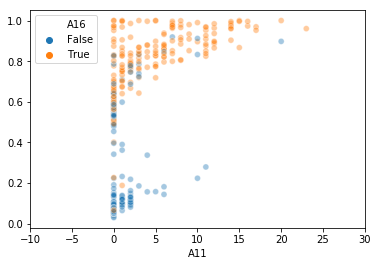

In [37]:
y_pred_prob_train = model.predict_proba(X_train)[:,1]

sns.scatterplot(x=X_train['A11'], y=y_pred_prob_train, hue=y_train, alpha=0.4)
plt.xlim(-10,30)
plt.show()

Admittedly, not the clearest visual here. However, we can see that as A11 increases, our model is predicting a larger probability of the application being accepted.

A better idea, which I don't have time for, would be to train the logistic regression model on only this feature. Then repeat the visualization.